#Voyage.ai

**By Srinivas Rao Chavan & Romit Ganjoo**

In [4]:
!pip install huggingface datasets



```
# This is formatted as code
```

#Data Preprocessing

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime

In [6]:
from datasets import load_dataset

dataset = load_dataset("traversaal-ai-hackathon/hotel_datasets")

Generating train split: 0 examples [00:00, ? examples/s]

In [7]:
df=pd.DataFrame(dataset['train'])

In [8]:
df.head()
df.tail()

hotel_name  \
5992  Hotel Campanile Paris Bercy Village   
5993  Hotel Campanile Paris Bercy Village   
5994  Hotel Campanile Paris Bercy Village   
5995  Hotel Campanile Paris Bercy Village   
5996  Hotel Campanile Paris Bercy Village   

                                      hotel_description  \
5992  In the east of Paris, the hotel Campanile Berc...   
5993  In the east of Paris, the hotel Campanile Berc...   
5994  In the east of Paris, the hotel Campanile Berc...   
5995  In the east of Paris, the hotel Campanile Berc...   
5996  In the east of Paris, the hotel Campanile Berc...   

                                review_title  \
5992  Nice hotel but had trouble booking in.   
5993                          Great Location   
5994                          Great location   
5995                      For one night only   
5996               Nice hotel in Paris Bercy   

                                            review_text  rate  \
5992  We had just had a very long and delayed train ...   3.0   
5993  We stayed at the Kyriad Hotel Paris Bercy Vill...   4.0   
5994  Stayed here for a few days and it is a great l...   5.0   
5995  We stayed here for one night on our way to Ita...   3.0   
5996  The Hotel is close to the metro station Cour S...   4.0   

             tripdate                                          hotel_url  \
5992   September 2019  https://www.tripadvisor.com/Hotel_Review-g1871...   
5993   September 2019  https://www.tripadvisor.com/Hotel_Review-g1871...   
5994     October 2019  https://www.tripadvisor.com/Hotel_Review-g1871...   
5995   September 2019  https://www.tripadvisor.com/Hotel_Review-g1871...   
5996   September 2019  https://www.tripadvisor.com/Hotel_Review-g1871...   

                                            hotel_image  \
5992  https://media-cdn.tripadvisor.com/media/photo-...   
5993  https://media-cdn.tripadvisor.com/media/photo-...   
5994  https://media-cdn.tripadvisor.com/media/photo-...   
5995  https://media-cdn.tripadvisor.com/media/photo-...   
5996  https://media-cdn.tripadvisor.com/media/photo-...   

                                            price_range  rating_value  \
5992  $ (Based on Average Nightly Rates for a Standa...           4.0   
5993  $ (Based on Average Nightly Rates for a Standa...           4.0   
5994  $ (Based on Average Nightly Rates for a Standa...           4.0   
5995  $ (Based on Average Nightly Rates for a Standa...           4.0   
5996  $ (Based on Average Nightly Rates for a Standa...           4.0   

      review_count       street_address locality country  
5992          1625  17 rue Baron le Roy    Paris  France  
5993          1625  17 rue Baron le Roy    Paris  France  
5994          1625  17 rue Baron le Roy    Paris  France  
5995          1625  17 rue Baron le Roy    Paris  France  
5996          1625  17 rue Baron le Roy    Paris  France

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         5997 non-null   object 
 1   hotel_description  5197 non-null   object 
 2   review_title       5997 non-null   object 
 3   review_text        4867 non-null   object 
 4   rate               4867 non-null   float64
 5   tripdate           5997 non-null   object 
 6   hotel_url          5997 non-null   object 
 7   hotel_image        5997 non-null   object 
 8   price_range        5997 non-null   object 
 9   rating_value       5997 non-null   float64
 10  review_count       5997 non-null   int64  
 11  street_address     5997 non-null   object 
 12  locality           5997 non-null   object 
 13  country            5997 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 656.0+ KB


Removing Duplicate rows in the dataset

In [10]:
df = df.drop_duplicates()

*Handling Missing Values*

In [11]:
df['hotel_description'] = df['hotel_description'].fillna('No description') #filling missing values in hotel_description with value 'No description'
df['review_text'] = df['review_text'].fillna('No review') #filling missing values in review_text with value 'No review'
df['rate'] = df['rate'].fillna(df['rate'].mean()) #filling missing values in rate with value average value in rate feature
df['rating_value'] = df['rating_value'].fillna(df['rating_value'].mean())
df['review_count'] = df['review_count'].fillna(df['review_count'].mean())

*Convert price_range to a categorical type if it's not already*


In [12]:
df['price_range'] = df['price_range'].astype('category')

In [13]:
len(df['hotel_name'].unique())

150

#EDA

In [14]:
print(df.describe())

              rate  rating_value  review_count
count  5997.000000   5997.000000   5997.000000
mean      4.368810      4.446640   3380.770885
std       1.056208      0.432757   3771.730100
min       1.000000      3.000000     39.000000
25%       4.368810      4.000000    962.000000
50%       5.000000      4.500000   2053.000000
75%       5.000000      5.000000   4595.000000
max       5.000000      5.000000  24877.000000


*distribution of ratings and reviews*

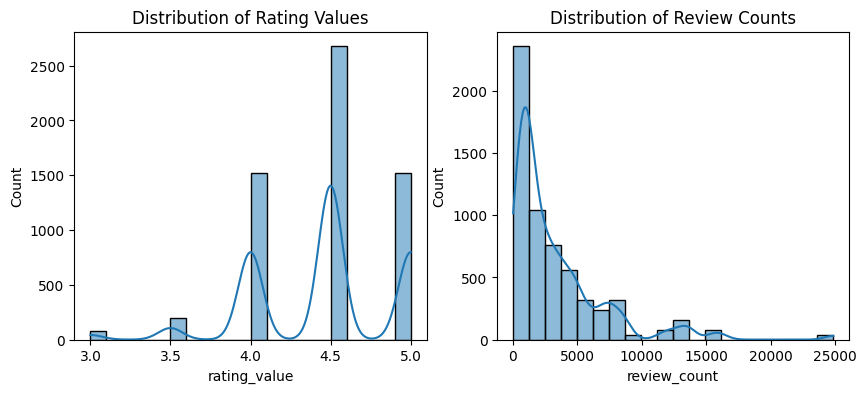

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['rating_value'], bins=20, kde=True)
plt.title('Distribution of Rating Values')

plt.subplot(1, 2, 2)
sns.histplot(df['review_count'], bins=20, kde=True)
plt.title('Distribution of Review Counts')
plt.show()

Price Range Analysis

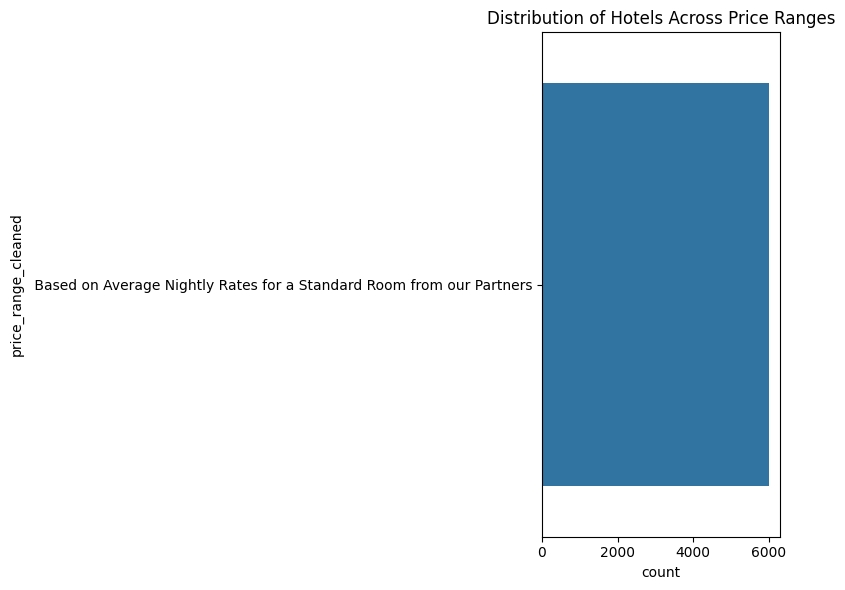

In [16]:
# Clean the 'price_range' column
df['price_range_cleaned'] = df['price_range'].str.replace('[^\w\s]', '', regex=True)

# Now attempt to visualize the distribution across the cleaned price ranges
plt.figure(figsize=(8, 6))
sns.countplot(y='price_range_cleaned', data=df, order=df['price_range_cleaned'].value_counts().index)
plt.title('Distribution of Hotels Across Price Ranges')
plt.tight_layout()  # Adjust layout to make room for the larger plot labels if necessary
plt.show()

Locality and Country Analysis

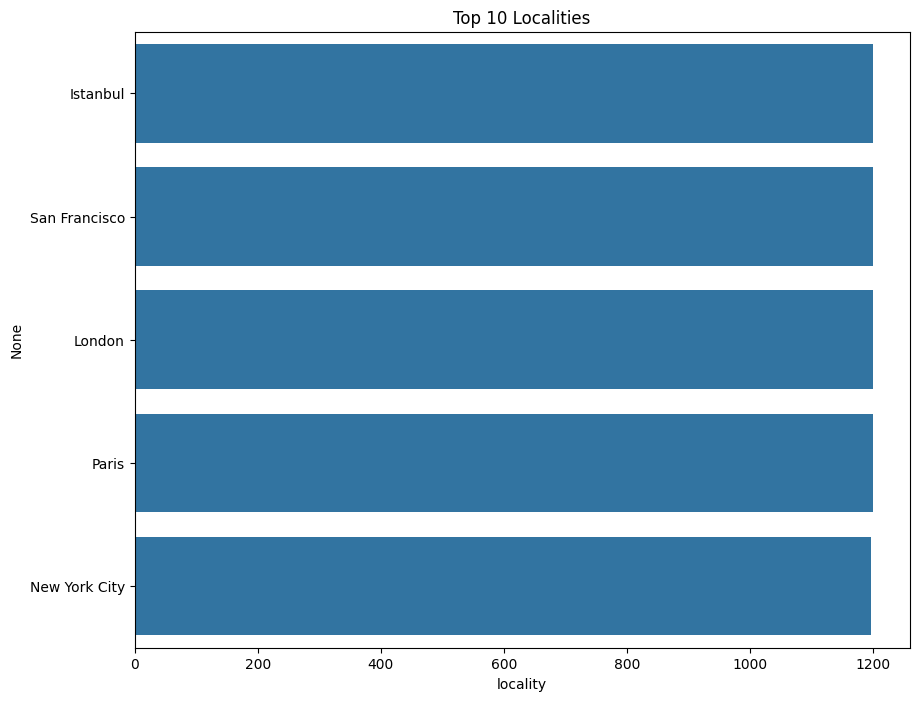

In [17]:
top_localities = df['locality'].value_counts().head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_localities, y=top_localities.index)
plt.title('Top 10 Localities')
plt.show()

*Display Top countries

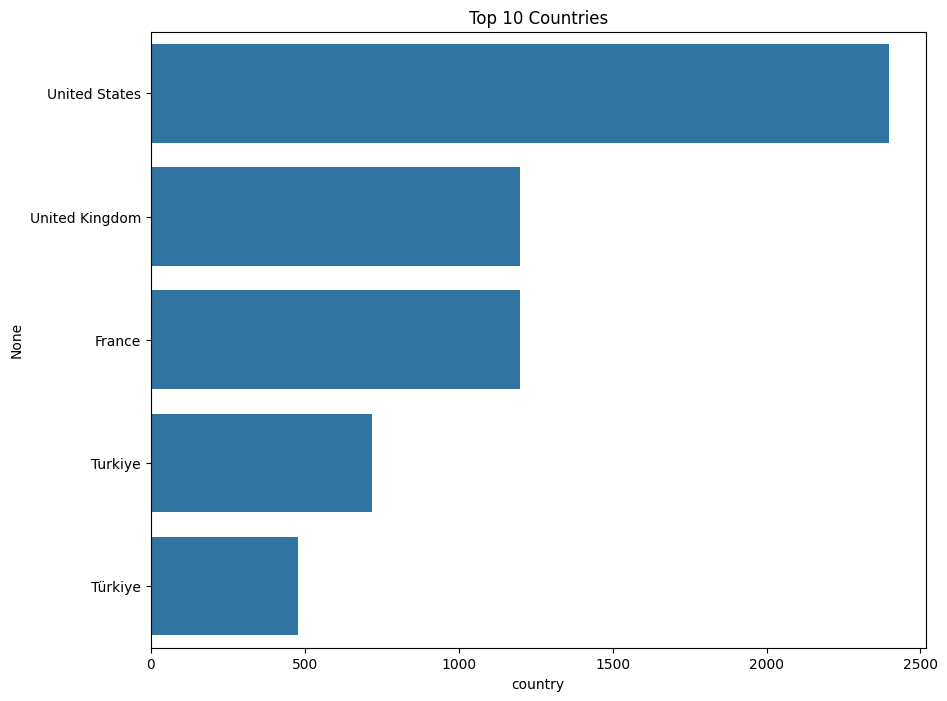

In [18]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_countries, y=top_countries.index)
plt.title('Top 10 Countries')
plt.show()

Text Analysis of Hotel Descriptions

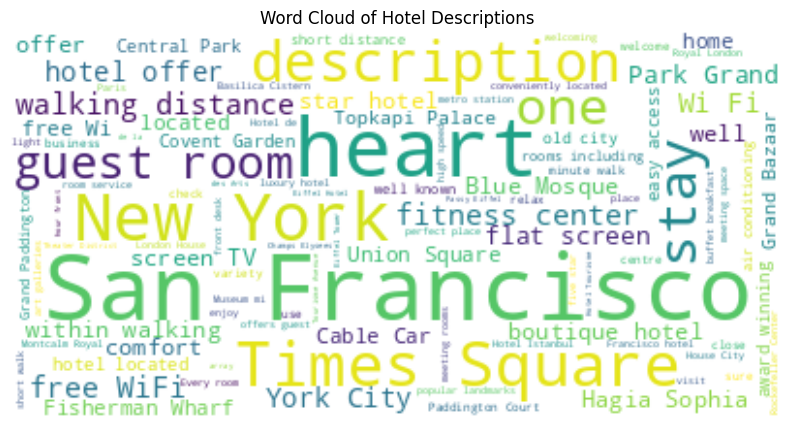

In [19]:
text = ' '.join(df['hotel_description'].dropna())
wordcloud = WordCloud(background_color='white', max_words=200).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hotel Descriptions')
plt.show()

*Preparing the data for generating embeddings*

In [20]:
from transformers import pipeline

# Load the summarization pipeline with a pre-trained model
summarizer = pipeline("summarization")

def summarize_text(text, max_length=5):
    """
    Summarizes the given text to a maximum length.
    """
    # Return the text directly if it's short enough
    if len(text.split()) <= max_length:
        return text

    # Calculate a proportional max_length based on the input text's length
    input_length = len(text.split())
    dynamic_max_length = min(max_length, max(30, int(input_length / 2)))  # Ensures some reduction, minimum length 30

    # Summarize the text with adjusted max_length
    summary_list = summarizer(text, max_length=dynamic_max_length, min_length=5, truncation=True)
    summary_text = summary_list[0]['summary_text']

    return summary_text


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [21]:
import pandas as pd

# Assuming df is your DataFrame loaded from a CSV or other data source

# Convert 'tripdate' to datetime type for sorting
df['tripdate'] = pd.to_datetime(df['tripdate'], errors='coerce')

# Exclude rows where 'review_text' contains 'No review'
df_filtered = df[df['review_text'].str.contains('No review') == False]

# Now, for each hotel, aggregate the top 10 most recent 'review_text'
# Assume 'hotel_name' and 'locality' uniquely identify each hotel
def aggregate_top_10_reviews(group):
    # Sort the group by 'tripdate' in descending order to get the most recent reviews first
    sorted_group = group.sort_values(by='tripdate', ascending=False)
    # Concatenate up to the top 10 'review_text' values, separated by a space
    return ' '.join(sorted_group['review_text'].head(10))

aggregated_reviews = df_filtered.groupby(['hotel_name', 'locality']).apply(aggregate_top_10_reviews).reset_index(name='aggregated_review_text')



# Initialize a new dictionary to hold the structured data with aggregated reviews
city_dicts = {}

for _, row in aggregated_reviews.iterrows():
    city = row['locality']
    hotel_name = row['hotel_name']
    aggregated_review_text = row['aggregated_review_text']

    # Initialize the city list if not already present
    if city not in city_dicts:
        city_dicts[city] = []

    # Retrieve the original hotel information to preserve other details
    original_info = df[(df['hotel_name'] == hotel_name) & (df['locality'] == city)].iloc[0]

    # Structure for the aggregated review data
    hotel_data = {
        "id": original_info.name,  # Using DataFrame index as a unique ID
        "vector": [],  # Placeholder for future embeddings
        "payload": {
            "hotel_name": original_info['hotel_name'],
            "hotel_description": summarize_text(original_info['hotel_description']),
            "review_text": summarize_text(aggregated_review_text),  # The aggregated review texts
        }
    }

    # Append the structured hotel data to the corresponding city list
    city_dicts[city].append(hotel_data)
city_dicts['San Francisco']

[{'id': 1760,
  'vector': [],
  'payload': {'hotel_name': 'Argonaut Hotel',
   'hotel_description': ' The Argon',
   'review_text': ' The Argon'}},
 {'id': 1960,
  'vector': [],
  'payload': {'hotel_name': 'Axiom Hotel',
   'hotel_description': ' Axiom',
   'review_text': ' The Ax'}},
 {'id': 1520,
  'vector': [],
  'payload': {'hotel_name': 'BEI San Francisco, Trademark Collection by Wyndham',
   'hotel_description': ' BEI',
   'review_text': ' BEI'}},
 {'id': 1240,
  'vector': [],
  'payload': {'hotel_name': 'Beacon Grand A Union Square Hotel',
   'hotel_description': 'No description',
   'review_text': ' The Beacon'}},
 {'id': 1400,
  'vector': [],
  'payload': {'hotel_name': 'Chancellor Hotel on Union Square',
   'hotel_description': ' The Chancellor',
   'review_text': ' Hotel is'}},
 {'id': 2160,
  'vector': [],
  'payload': {'hotel_name': 'Cow Hollow Inn and Suites',
   'hotel_description': 'No description',
   'review_text': ' The hotel'}},
 {'id': 1840,
  'vector': [],
  'payl

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pickle

# Save the city_dicts structure to a file
pickle_file_path = '/mnt/city_dicts.pkl'  # Adjust path as needed
with open(pickle_file_path, 'wb') as file:
    pickle.dump(city_dicts, file)

print(f"Data saved to {pickle_file_path}")


Data saved to /mnt/city_dicts.pkl


In [24]:
import pickle

# Load the city_dicts structure from the file
pickle_file_path = '/mnt/city_dicts.pkl'  # Adjust path as needed
with open(pickle_file_path, 'rb') as file:
    city_dicts= pickle.load(file)

print("Data loaded successfully.")
# Now city_dicts_loaded contains the structure saved earlier


Data loaded successfully.


In [25]:
# Initialize an empty list to hold the concatenated texts
concatenated_texts = []

# Iterate over the city_dicts structure to concatenate the required information
for city, hotels in city_dicts.items():
    for hotel in hotels:
        # Concatenate the required fields: city name, hotel name, hotel description, and review text
        concatenated_text = f"{city} {hotel['payload']['hotel_name']} {hotel['payload']['hotel_description']} {hotel['payload']['review_text']}"
        concatenated_texts.append(concatenated_text)

# Specify the file path where you want to save the data
file_path = '/mnt/summ_texts.txt'  # Adjust the path as needed for your environment

# Writing the concatenated texts to the specified file
with open(file_path, 'w', encoding='utf-8') as file:
    for text in concatenated_texts:
        file.write(text + "\n")

print(f"Concatenated texts have been saved to {file_path}")


Concatenated texts have been saved to /mnt/summ_texts.txt
